# Predição de Diabetes Usando *Machine Learning*
----

### Grupo:

- Beatriz
- Bernardo Abelo
- Carlos Dias
- Luana Tocchio
- Vivian

-----

Link dataset: [Diabetes, Hypertension and Stroke Prediction](https://https://www.kaggle.com/datasets/prosperchuks/health-dataset)

Referência: [Diabetes Prediction Using Machine Learning](https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/)

-----



## 1. Visão Geral

Neste trabalho realizaremos a análise exploratória e aplicação de dois modelos de *machine learning* (ML) no *dataset* **Diabetes**, obtido no Kaggle, a fim de prever se o paciente **tem ou não diabetes** e definir se os modelos escolhidos estão aptos a serem aplicados na produção.

As etapas realizadas foram:

- Importação do *dataset*;
- Limpeza e análise exploratória;
- Teste de modelos de ML;
- Otimização de hiperparâmetros escolhidos;
- Aplicação dos modelos nos dados de teste.

## 2. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report, make_scorer, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, GridSearchCV, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## 3. Limpeza e Análise Exploratória

In [3]:
df = pd.read_csv('diabetes_data.csv')
df

FileNotFoundError: ignored

# Labels

## Diabetes:
columns = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes']

===============================================================================

'Age' = 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older;

*'Sex' = 0 = female 1 = male;

'HighChol' = High Cholesteral; 0 = no, 1 = yes;

'CholCheck' = Cholesteral Check; 0 = no CholCheck in 5 years, 1 = yes CholCheck in 5 years;

'BMI' = Body Mass Index;

*'Smoker' = Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes;

'HeartDiseaseorAttack' = coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes;

'PhysActivity' = physical activity in past 30 days - not including job 0 = no 1 = yes;

*'Fruits' = Consume Fruit 1 or more times per day 0 = no 1 = yes;

*'Veggies' = Consume Vegetables 1 or more times per day 0 = no 1 = yes;

*'HvyAlcoholConsump' = Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no, 1 = yes;

'GenHlth' = Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor;

*'MentHlth' = Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?;

*'PhysHlth' = Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?;

'DiffWalk' = Do you have serious difficulty walking or climbing stairs?  0 = no 1 = yes;

'Stroke' = (Ever told) you had a stroke. 0 = no 1 = yes;

'HighBP' = High Blood Pressure; 0 = no high BP, 1 = high BP;

'Diabetes' = 0 = no diabetes, 1 = diabetes.

In [ ]:
df.shape

(70692, 18)

In [ ]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
df.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


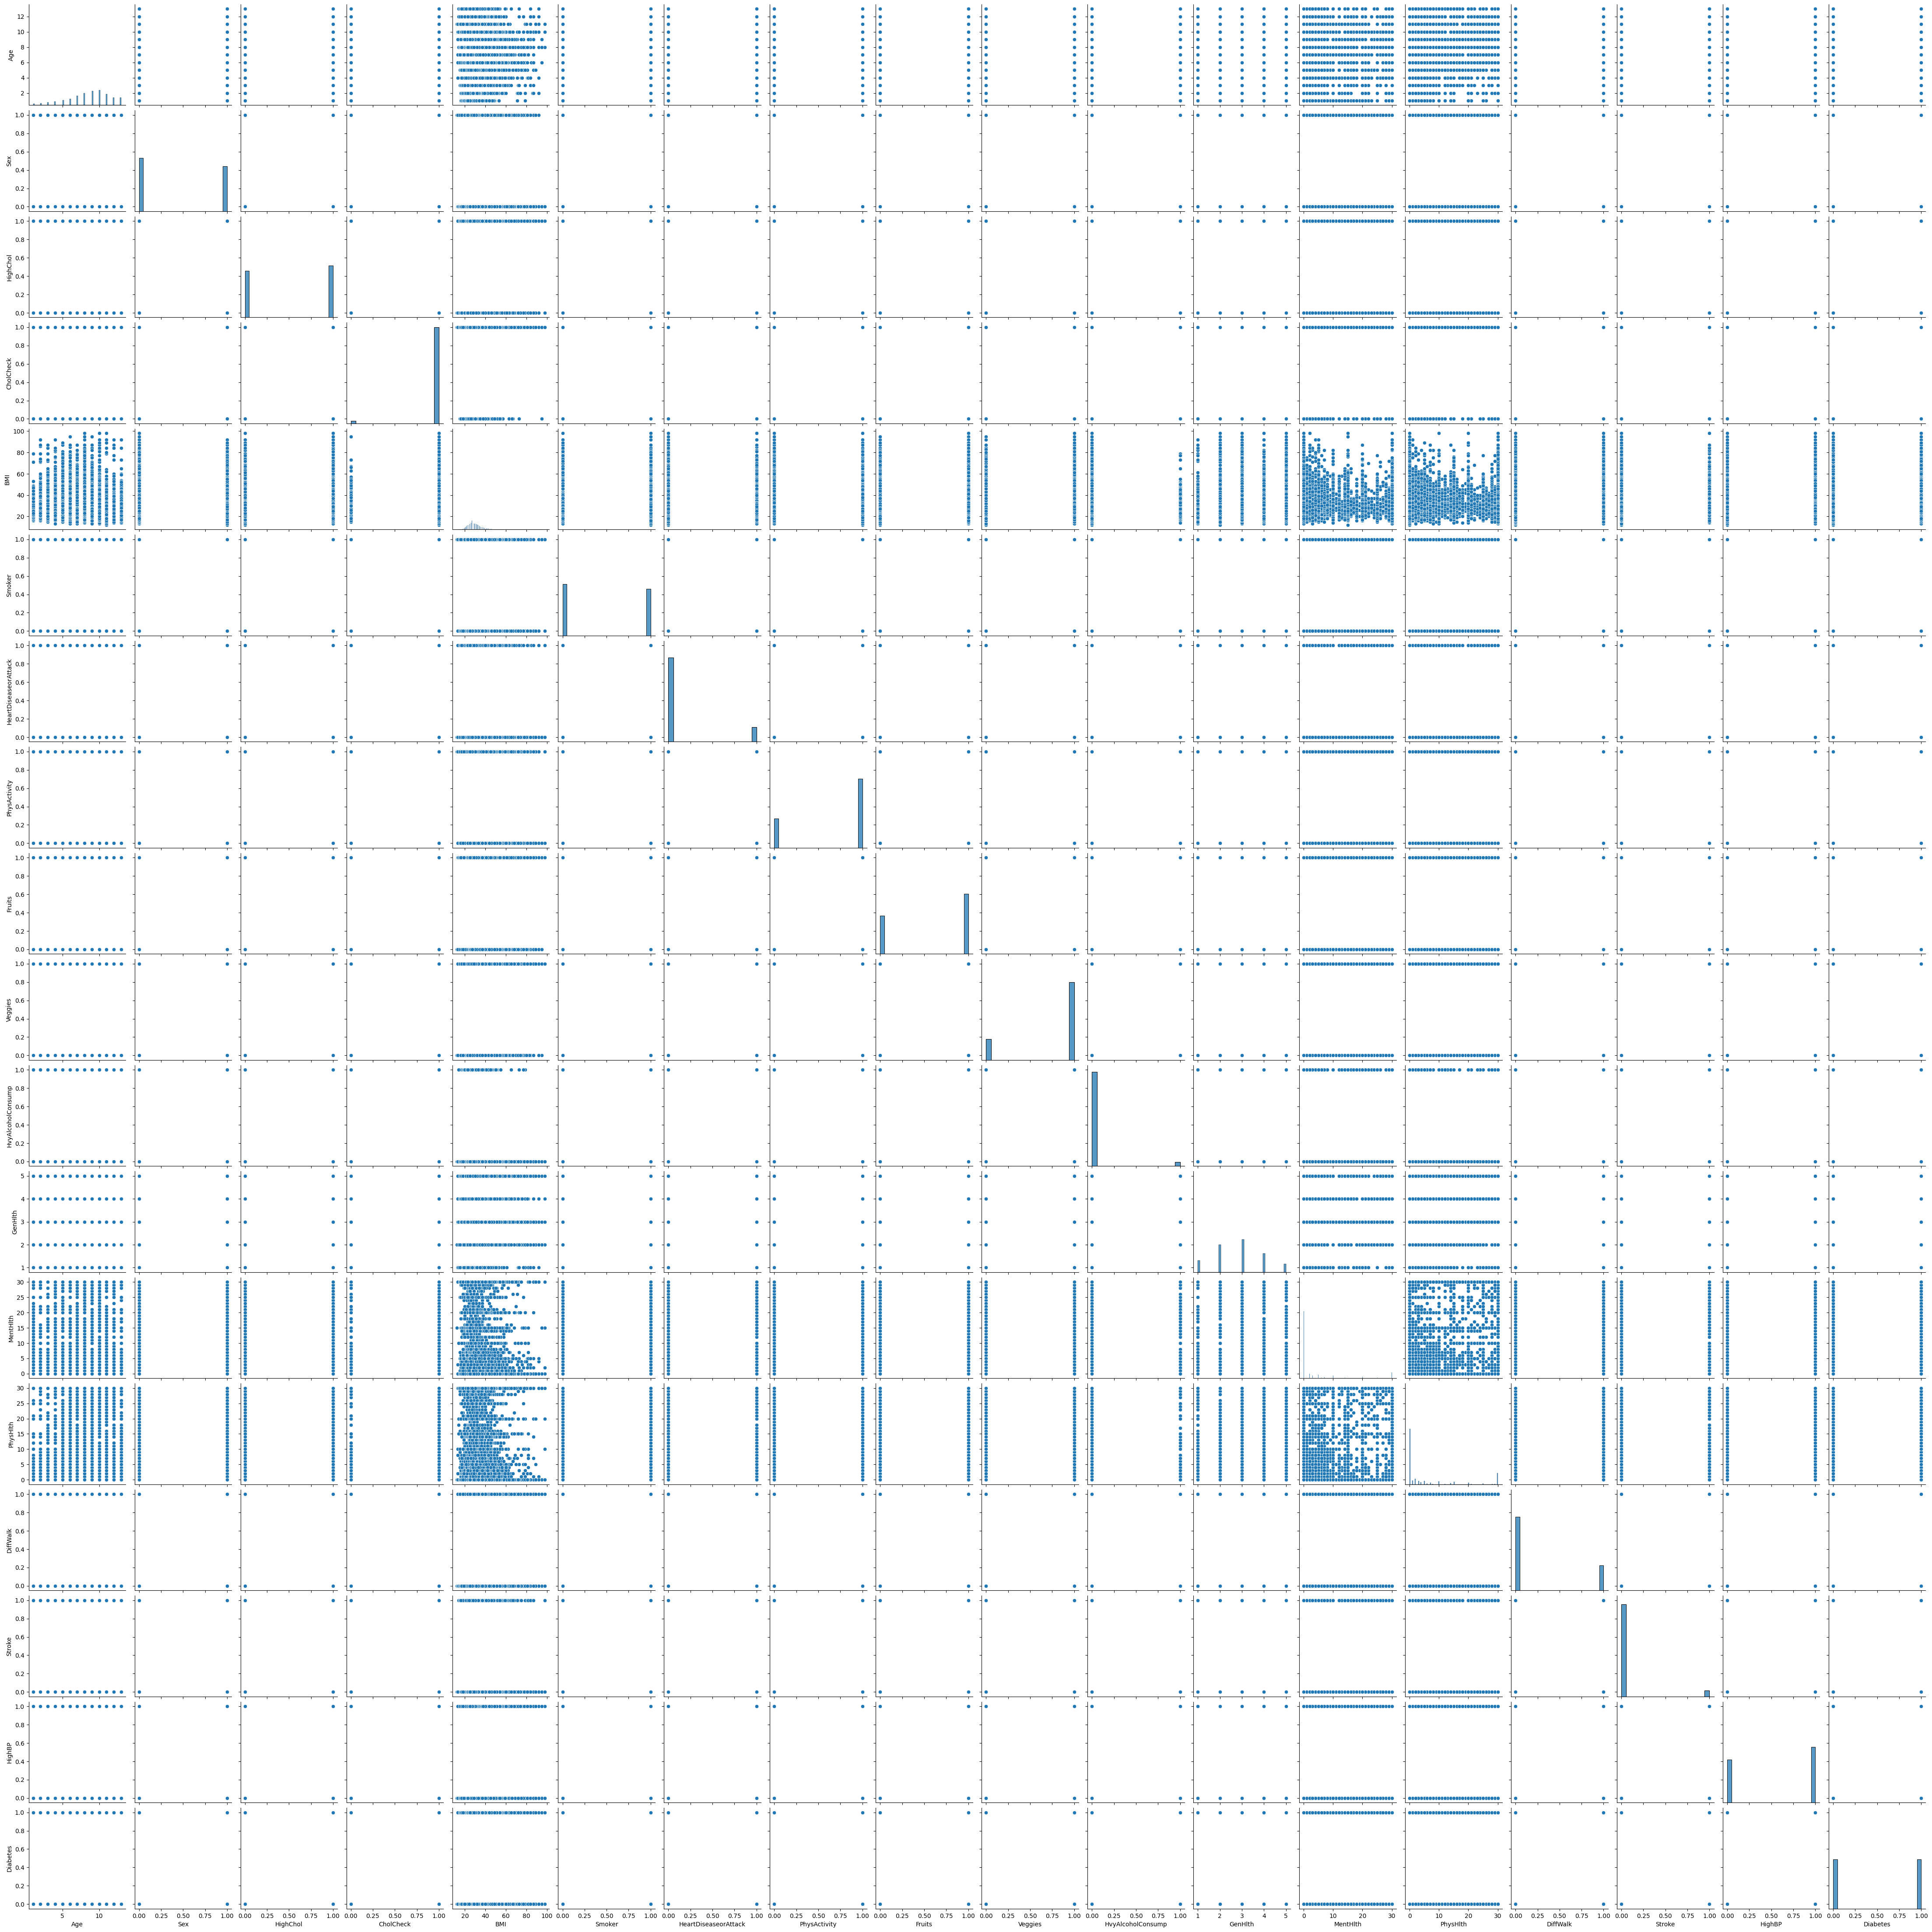

In [ ]:
sns.pairplot(df)

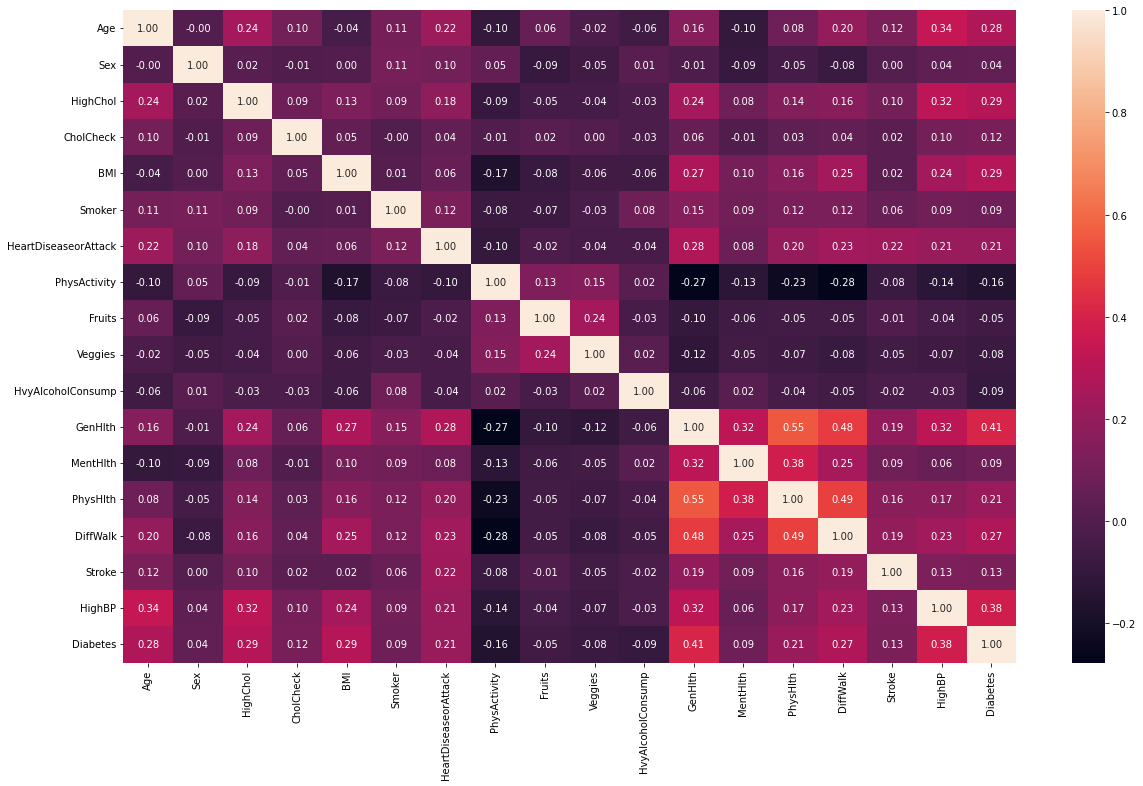

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', ax=ax)
plt.show()

In [ ]:
df['Diabetes'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

___________________
___________________

Primeiro modelo: Baseline com Regressão Logística

In [ ]:
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
modelo_logistica = LogisticRegression(max_iter=300)
modelo_logistica.fit(X_train, y_train)
y_pred = modelo_logistica.predict(X_test)

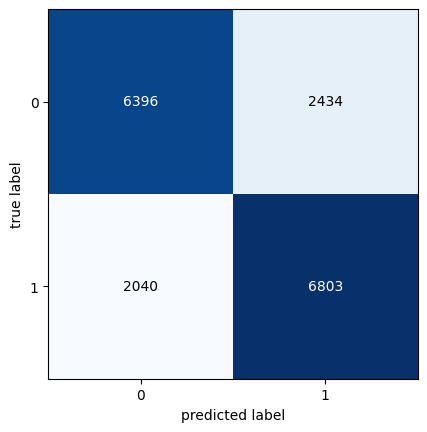

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      8837
         1.0       0.74      0.77      0.75      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



____________
____________

Regressão Logística utilizando otimização de hiperparâmetros, sem considerar o escalonamento e usando todas as colunas do dataset. Os hiperparâmetros escolhidos para otimização são adequados para um dataset não-multi-class.

In [ ]:
# Load dataset
df = pd.read_csv('diabetes_data.csv')

# Split data into features and target
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

# Create a dictionary of hyperparameters to tune
logreg_params = {"penalty" : ["l1", "l2"],
                  "solver" : ["lbfgs", "liblinear"],
                  "max_iter" : range(300, 1000, 100)}

# Create a logistic regression estimator
logreg = LogisticRegression()

# Use GridSearchCV to tune hyperparameters for each estimator
logreg_grid = GridSearchCV(estimator=logreg, param_grid=logreg_params, scoring='recall', cv=5)

# Fit each estimator to the data
logreg_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("Logistic Regression best hyperparameters: ", logreg_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
logreg_recall = cross_val_score(logreg_grid.best_estimator_, X_train, y_train, cv=5, scoring='recall')

# Print the mean recall score for each estimator
print("Logistic Regression mean recall score: ", logreg_recall.mean())


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver l

Logistic Regression best hyperparameters:  {'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression mean recall score:  0.7683138438325161


In [ ]:
df_logreg_grid = pd.DataFrame(logreg_grid.cv_results_)
df_logreg_grid.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.561550,0.299391,0.017146,0.006823,500,l1,liblinear,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.774613,0.780272,0.761977,0.760656,0.764429,0.768389,0.007701,1
1,1.755883,0.320236,0.017101,0.005955,300,l1,liblinear,"{'max_iter': 300, 'penalty': 'l1', 'solver': '...",0.774802,0.779894,0.761977,0.760656,0.764429,0.768352,0.007617,2
17,1.661676,0.245943,0.022638,0.010815,700,l1,liblinear,"{'max_iter': 700, 'penalty': 'l1', 'solver': '...",0.774613,0.780083,0.761977,0.760468,0.764617,0.768352,0.007663,2
5,1.522614,0.270352,0.021643,0.008422,400,l1,liblinear,"{'max_iter': 400, 'penalty': 'l1', 'solver': '...",0.774613,0.780083,0.761977,0.760468,0.764429,0.768314,0.007681,4
21,2.713738,1.281065,0.016492,0.005878,800,l1,liblinear,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.774802,0.779894,0.761977,0.760468,0.764429,0.768314,0.007655,4


[[6405 2432]
 [2064 6772]]


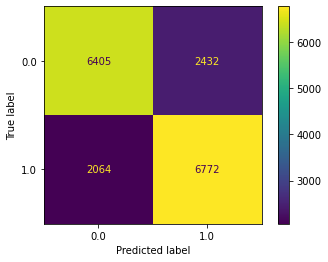

In [ ]:
y_pred = logreg_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      8837
         1.0       0.74      0.77      0.75      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



_________________________
_________________________


Regressão Logística com otimizaçao de hiperparâmetros e escalonamento usando o pipeline, com dataset reduzido em número de colunas. O critério de exclusão das colunas se baseou no índice de correlação entre as features e o target.

In [ ]:
cols = ['Sex', 'Smoker',
       'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'MentHlth']
df2 = df.drop(cols, axis=1)
df2.head()

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,1.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,1.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,1.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Regressão Logística

X = df2.drop('Diabetes', axis = 1)
y = df2['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("logreg", LogisticRegression())]

pipe = Pipeline(lista_etapas)

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

metrica = "recall"

logreg_params = {"logreg__penalty" : ["l1", "l2"],
                  "logreg__solver" : ["lbfgs", "liblinear"],
                  "logreg__max_iter" : range(300, 1000, 100)}

logreg_grid = GridSearchCV(estimator=pipe, param_grid=logreg_params, scoring=metrica, cv=splitter)

logreg_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("Logistic Regression best hyperparameters: ", logreg_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
logreg_recall = cross_val_score(logreg_grid.best_estimator_, X_train, y_train, cv=5, scoring='recall')

# Print the mean recall score for each estimator
print("Logistic Regression mean recall score: ", logreg_recall.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

Logistic Regression best hyperparameters:  {'logreg__max_iter': 700, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Logistic Regression mean recall score:  0.7677102980007545


[[6411 2426]
 [2073 6763]]


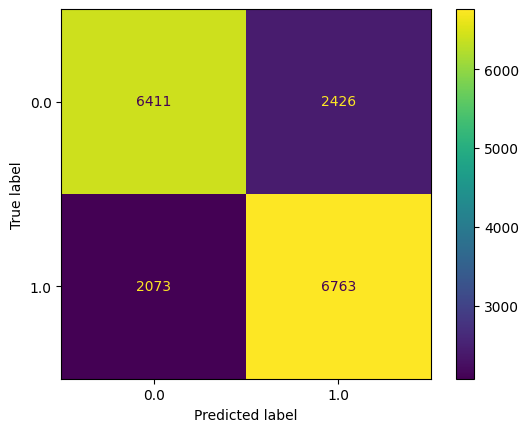

In [ ]:
y_pred = logreg_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      8837
         1.0       0.74      0.77      0.75      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



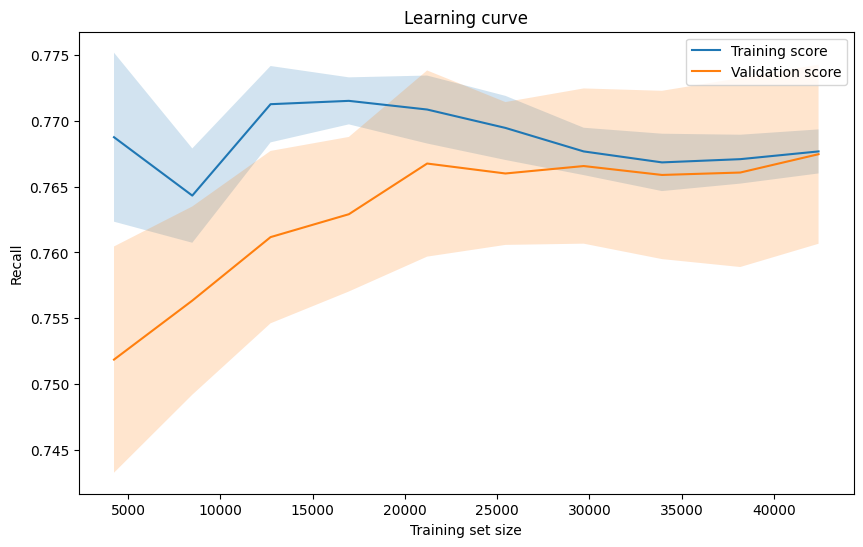

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(logreg_grid.best_estimator_, X_train, y_train, 
                                                        cv=splitter, scoring=metrica, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Recall')
plt.title('Learning curve')
plt.show()


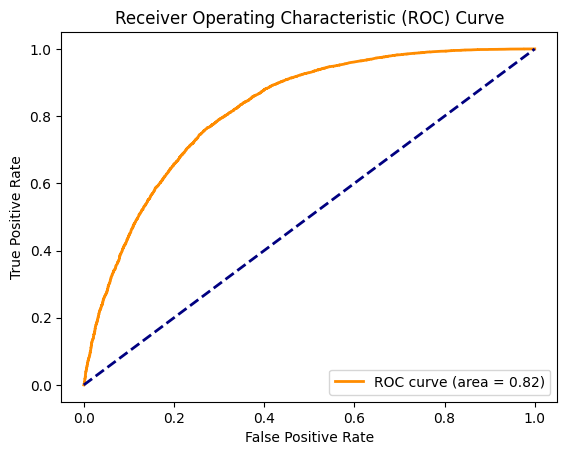

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the logistic regression model with the best hyperparameters
best_pipe = logreg_grid.best_estimator_
best_pipe.fit(X_train, y_train)

# Predict the probabilities of the positive class (1) for the test set
y_prob = best_pipe.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR) and true positive rate (TPR) at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


________________________________
________________________________


In [ ]:
# KNN dataset completo

knn_params = {"weights" : ["distance", "uniform"],
              "metric" : ["manhattan", "euclidean", "minkowski"],
              "n_neighbors" : range(3, 20)}

# Create a KNN estimator
knn = KNeighborsClassifier()

# Use GridSearchCV to tune hyperparameters for each estimator
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params, scoring='recall', cv=5)

# Fit each estimator to the data
knn_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("KNN best hyperparameters: ", knn_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
knn_recall = cross_val_score(knn_grid.best_estimator_, X, y, cv=5, scoring='recall')

# Print the mean recall score for each estimator
print("KNN mean recall score: ", knn_recall.mean())

KNN best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
KNN mean recall score:  0.6190516354951785


melhores parâmetros KNN:

KNN best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

KNN mean recall score:  0.6190516354951785

Tempo estimado: 51min

_____________________
_____________________


In [ ]:
# KNN dropando colunas

X = df2.drop('Diabetes', axis = 1)
y = df2['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

#metrica = "recall"

knn_params = {"knn__weights" : ["distance", "uniform"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(3, 20)}

knn_grid = GridSearchCV(estimator=pipe, param_grid=knn_params, scoring='recall', cv=splitter)

knn_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("KNN best hyperparameters: ", knn_grid.best_params_)

# Print the mean recall score for each estimator
#print("KNN mean recall score: ", knn_recall.mean())

KNN best hyperparameters:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'knn__weights': 'uniform'}


In [ ]:
# Use cross-validation to evaluate each estimator with the recall metric
knn_recall = cross_val_score(knn_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='recall')

In [ ]:
print("KNN mean recall score: ", knn_recall.mean())

KNN mean recall score:  0.7861847458086662


Há melhora considerável usando o KNN retirando algumas colunas e aplicando o standard scaler

_____________________
_____________________

Terceiro modelo: Decision Tree

In [ ]:
# Usando o DecisionTree sem drop

X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

pipe = Pipeline([("dtc", DecisionTreeClassifier())])

dtc_params = {"dtc__criterion" : ["gini", "entropy"],
                  "dtc__splitter" : ["best", "random"],
                  "dtc__max_depth" : range(2, 11)}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

dtc_grid = GridSearchCV(estimator=pipe, param_grid=dtc_params, scoring='recall', cv=splitter)

dtc_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("Logistic Regression best hyperparameters: ", dtc_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
dtc_recall = cross_val_score(dtc_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='recall')

# Print the mean recall score for each estimator
print("Logistic Regression mean recall score: ", dtc_recall.mean())

Logistic Regression best hyperparameters:  {'dtc__criterion': 'entropy', 'dtc__max_depth': 3, 'dtc__splitter': 'best'}
Logistic Regression mean recall score:  0.8647335809684862


In [ ]:
df_dtc_grid = pd.DataFrame(dtc_grid.cv_results_)
df_dtc_grid.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtc__criterion,param_dtc__max_depth,param_dtc__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.064484,0.002641,0.014849,0.000787,entropy,3,best,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.870384,0.873843,0.839855,0.871402,0.868184,0.864734,0.012572,1
2,0.044288,0.001059,0.011597,0.001982,gini,3,best,"{'dtc__criterion': 'gini', 'dtc__max_depth': 3...",0.861530,0.862323,0.839855,0.871402,0.858781,0.858778,0.010369,2
9,0.049384,0.001750,0.010130,0.000250,gini,6,random,"{'dtc__criterion': 'gini', 'dtc__max_depth': 6...",0.794273,0.809443,0.826112,0.820000,0.787702,0.807506,0.014652,3
6,0.060830,0.001484,0.010580,0.000923,gini,5,best,"{'dtc__criterion': 'gini', 'dtc__max_depth': 5...",0.797099,0.793012,0.769422,0.832336,0.812147,0.800803,0.020891,4
24,0.062007,0.002518,0.011615,0.002231,entropy,5,best,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.797664,0.802833,0.769422,0.827290,0.806318,0.800705,0.018605,5


[[4843 3994]
 [1149 7687]]


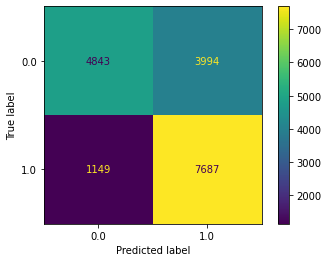

In [ ]:
y_pred = dtc_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.55      0.65      8837
         1.0       0.66      0.87      0.75      8836

    accuracy                           0.71     17673
   macro avg       0.73      0.71      0.70     17673
weighted avg       0.73      0.71      0.70     17673



[Text(0.5, 0.875, 'GenHlth <= 2.5\nentropy = 1.0\nsamples = 53019\nvalue = [26509, 26510]\nclass = y[1]'),
 Text(0.25, 0.625, 'HighBP <= 0.5\nentropy = 0.836\nsamples = 21211\nvalue = [15557, 5654]\nclass = y[0]'),
 Text(0.125, 0.375, 'Age <= 6.5\nentropy = 0.592\nsamples = 13008\nvalue = [11150, 1858]\nclass = y[0]'),
 Text(0.0625, 0.125, 'entropy = 0.344\nsamples = 5211\nvalue = [4876, 335]\nclass = y[0]'),
 Text(0.1875, 0.125, 'entropy = 0.712\nsamples = 7797\nvalue = [6274, 1523]\nclass = y[0]'),
 Text(0.375, 0.375, 'BMI <= 27.5\nentropy = 0.996\nsamples = 8203\nvalue = [4407, 3796]\nclass = y[0]'),
 Text(0.3125, 0.125, 'entropy = 0.937\nsamples = 3561\nvalue = [2304, 1257]\nclass = y[0]'),
 Text(0.4375, 0.125, 'entropy = 0.994\nsamples = 4642\nvalue = [2103, 2539]\nclass = y[1]'),
 Text(0.75, 0.625, 'HighBP <= 0.5\nentropy = 0.929\nsamples = 31808\nvalue = [10952, 20856]\nclass = y[1]'),
 Text(0.625, 0.375, 'Age <= 4.5\nentropy = 0.996\nsamples = 10147\nvalue = [5437, 4710]\nclass

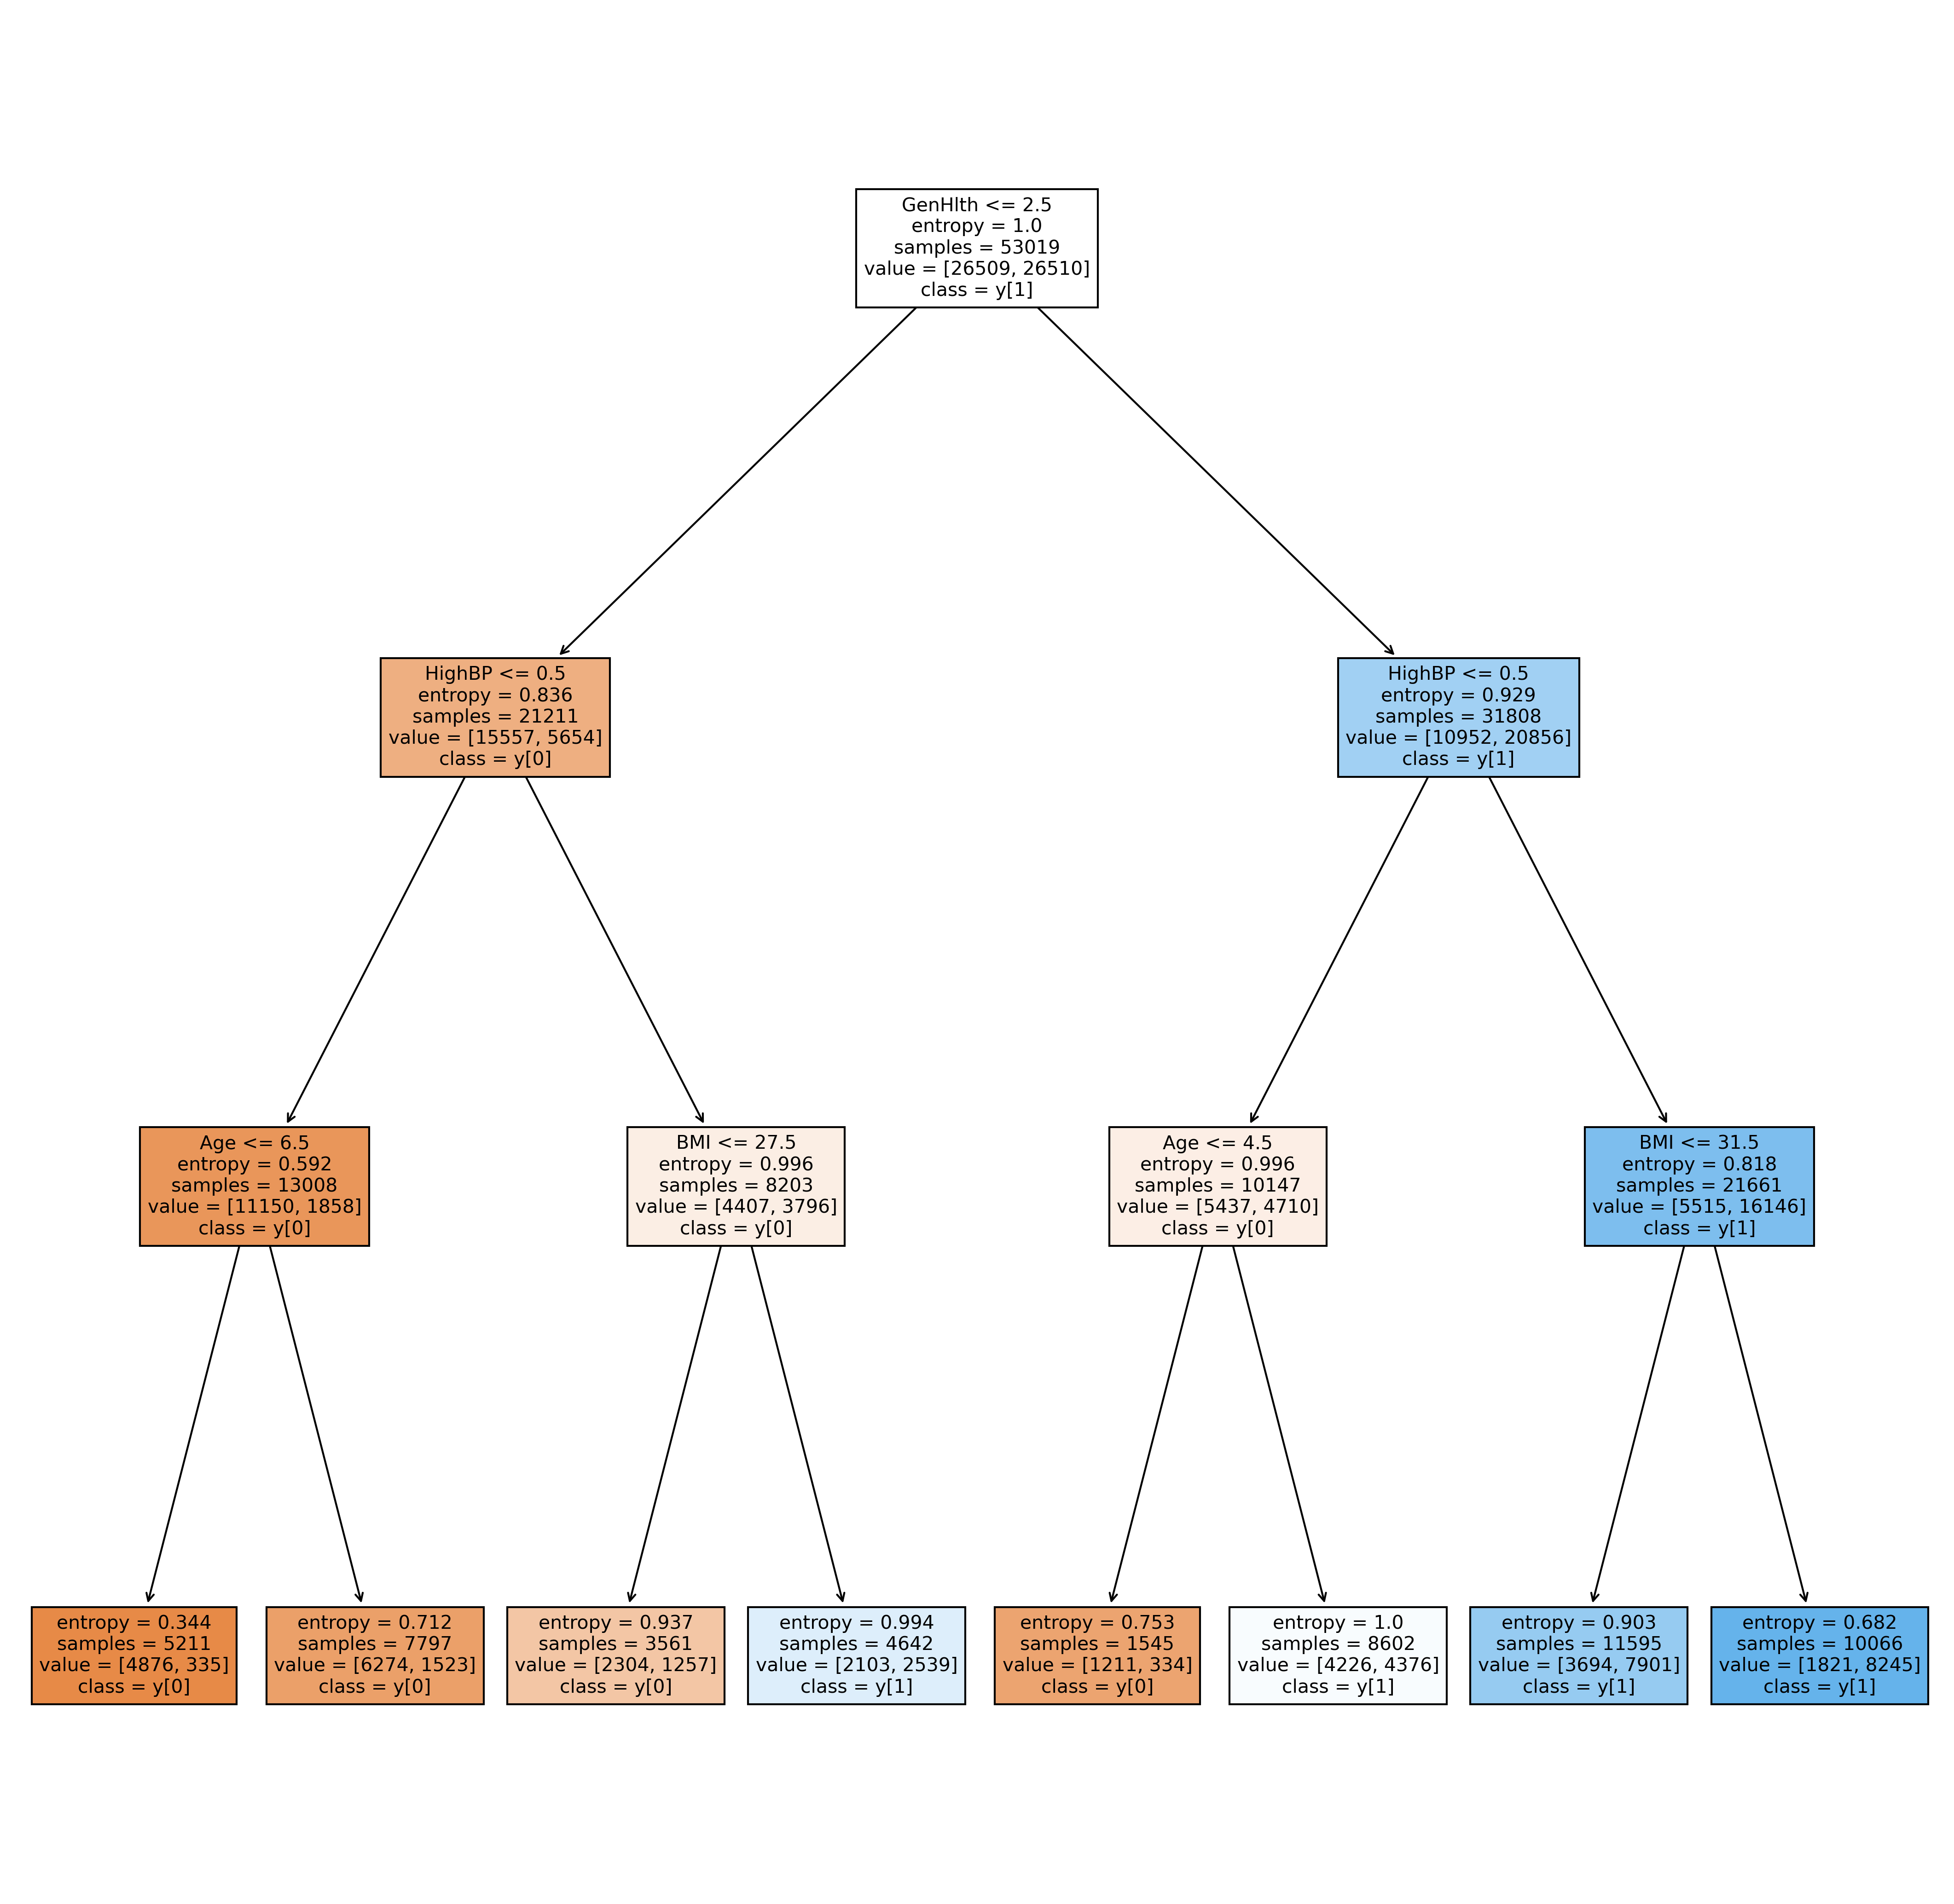

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=300)

plot_tree(dtc_grid.best_estimator_["dtc"], feature_names=X_train.columns, class_names=True, filled = True)

_____________________
_____________________

In [ ]:
# DecisionTree dropando colunas

X = df2.drop('Diabetes', axis = 1)
y = df2['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

pipe = Pipeline([("dtc", DecisionTreeClassifier())])

dtc_params = {"dtc__criterion" : ["gini", "entropy"],
                  "dtc__splitter" : ["best", "random"],
                  "dtc__max_depth" : range(2, 11)}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

dtc_grid = GridSearchCV(estimator=pipe, param_grid=dtc_params, scoring='recall', cv=splitter)

dtc_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("Logistic Regression best hyperparameters: ", dtc_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
dtc_recall = cross_val_score(dtc_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='recall')

# Print the mean recall score for each estimator
print("Logistic Regression mean recall score: ", dtc_recall.mean())

Logistic Regression best hyperparameters:  {'dtc__criterion': 'entropy', 'dtc__max_depth': 3, 'dtc__splitter': 'best'}
Logistic Regression mean recall score:  0.8647335809684862


[[4843 3994]
 [1149 7687]]


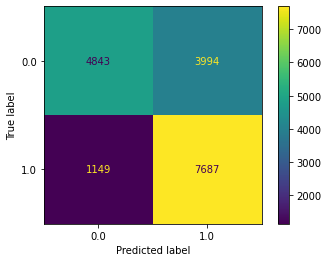

In [ ]:
y_pred = dtc_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.55      0.65      8837
         1.0       0.66      0.87      0.75      8836

    accuracy                           0.71     17673
   macro avg       0.73      0.71      0.70     17673
weighted avg       0.73      0.71      0.70     17673



[Text(0.5, 0.875, 'GenHlth <= 2.5\nentropy = 1.0\nsamples = 53019\nvalue = [26509, 26510]\nclass = y[1]'),
 Text(0.25, 0.625, 'HighBP <= 0.5\nentropy = 0.836\nsamples = 21211\nvalue = [15557, 5654]\nclass = y[0]'),
 Text(0.125, 0.375, 'Age <= 6.5\nentropy = 0.592\nsamples = 13008\nvalue = [11150, 1858]\nclass = y[0]'),
 Text(0.0625, 0.125, 'entropy = 0.344\nsamples = 5211\nvalue = [4876, 335]\nclass = y[0]'),
 Text(0.1875, 0.125, 'entropy = 0.712\nsamples = 7797\nvalue = [6274, 1523]\nclass = y[0]'),
 Text(0.375, 0.375, 'BMI <= 27.5\nentropy = 0.996\nsamples = 8203\nvalue = [4407, 3796]\nclass = y[0]'),
 Text(0.3125, 0.125, 'entropy = 0.937\nsamples = 3561\nvalue = [2304, 1257]\nclass = y[0]'),
 Text(0.4375, 0.125, 'entropy = 0.994\nsamples = 4642\nvalue = [2103, 2539]\nclass = y[1]'),
 Text(0.75, 0.625, 'HighBP <= 0.5\nentropy = 0.929\nsamples = 31808\nvalue = [10952, 20856]\nclass = y[1]'),
 Text(0.625, 0.375, 'Age <= 4.5\nentropy = 0.996\nsamples = 10147\nvalue = [5437, 4710]\nclass

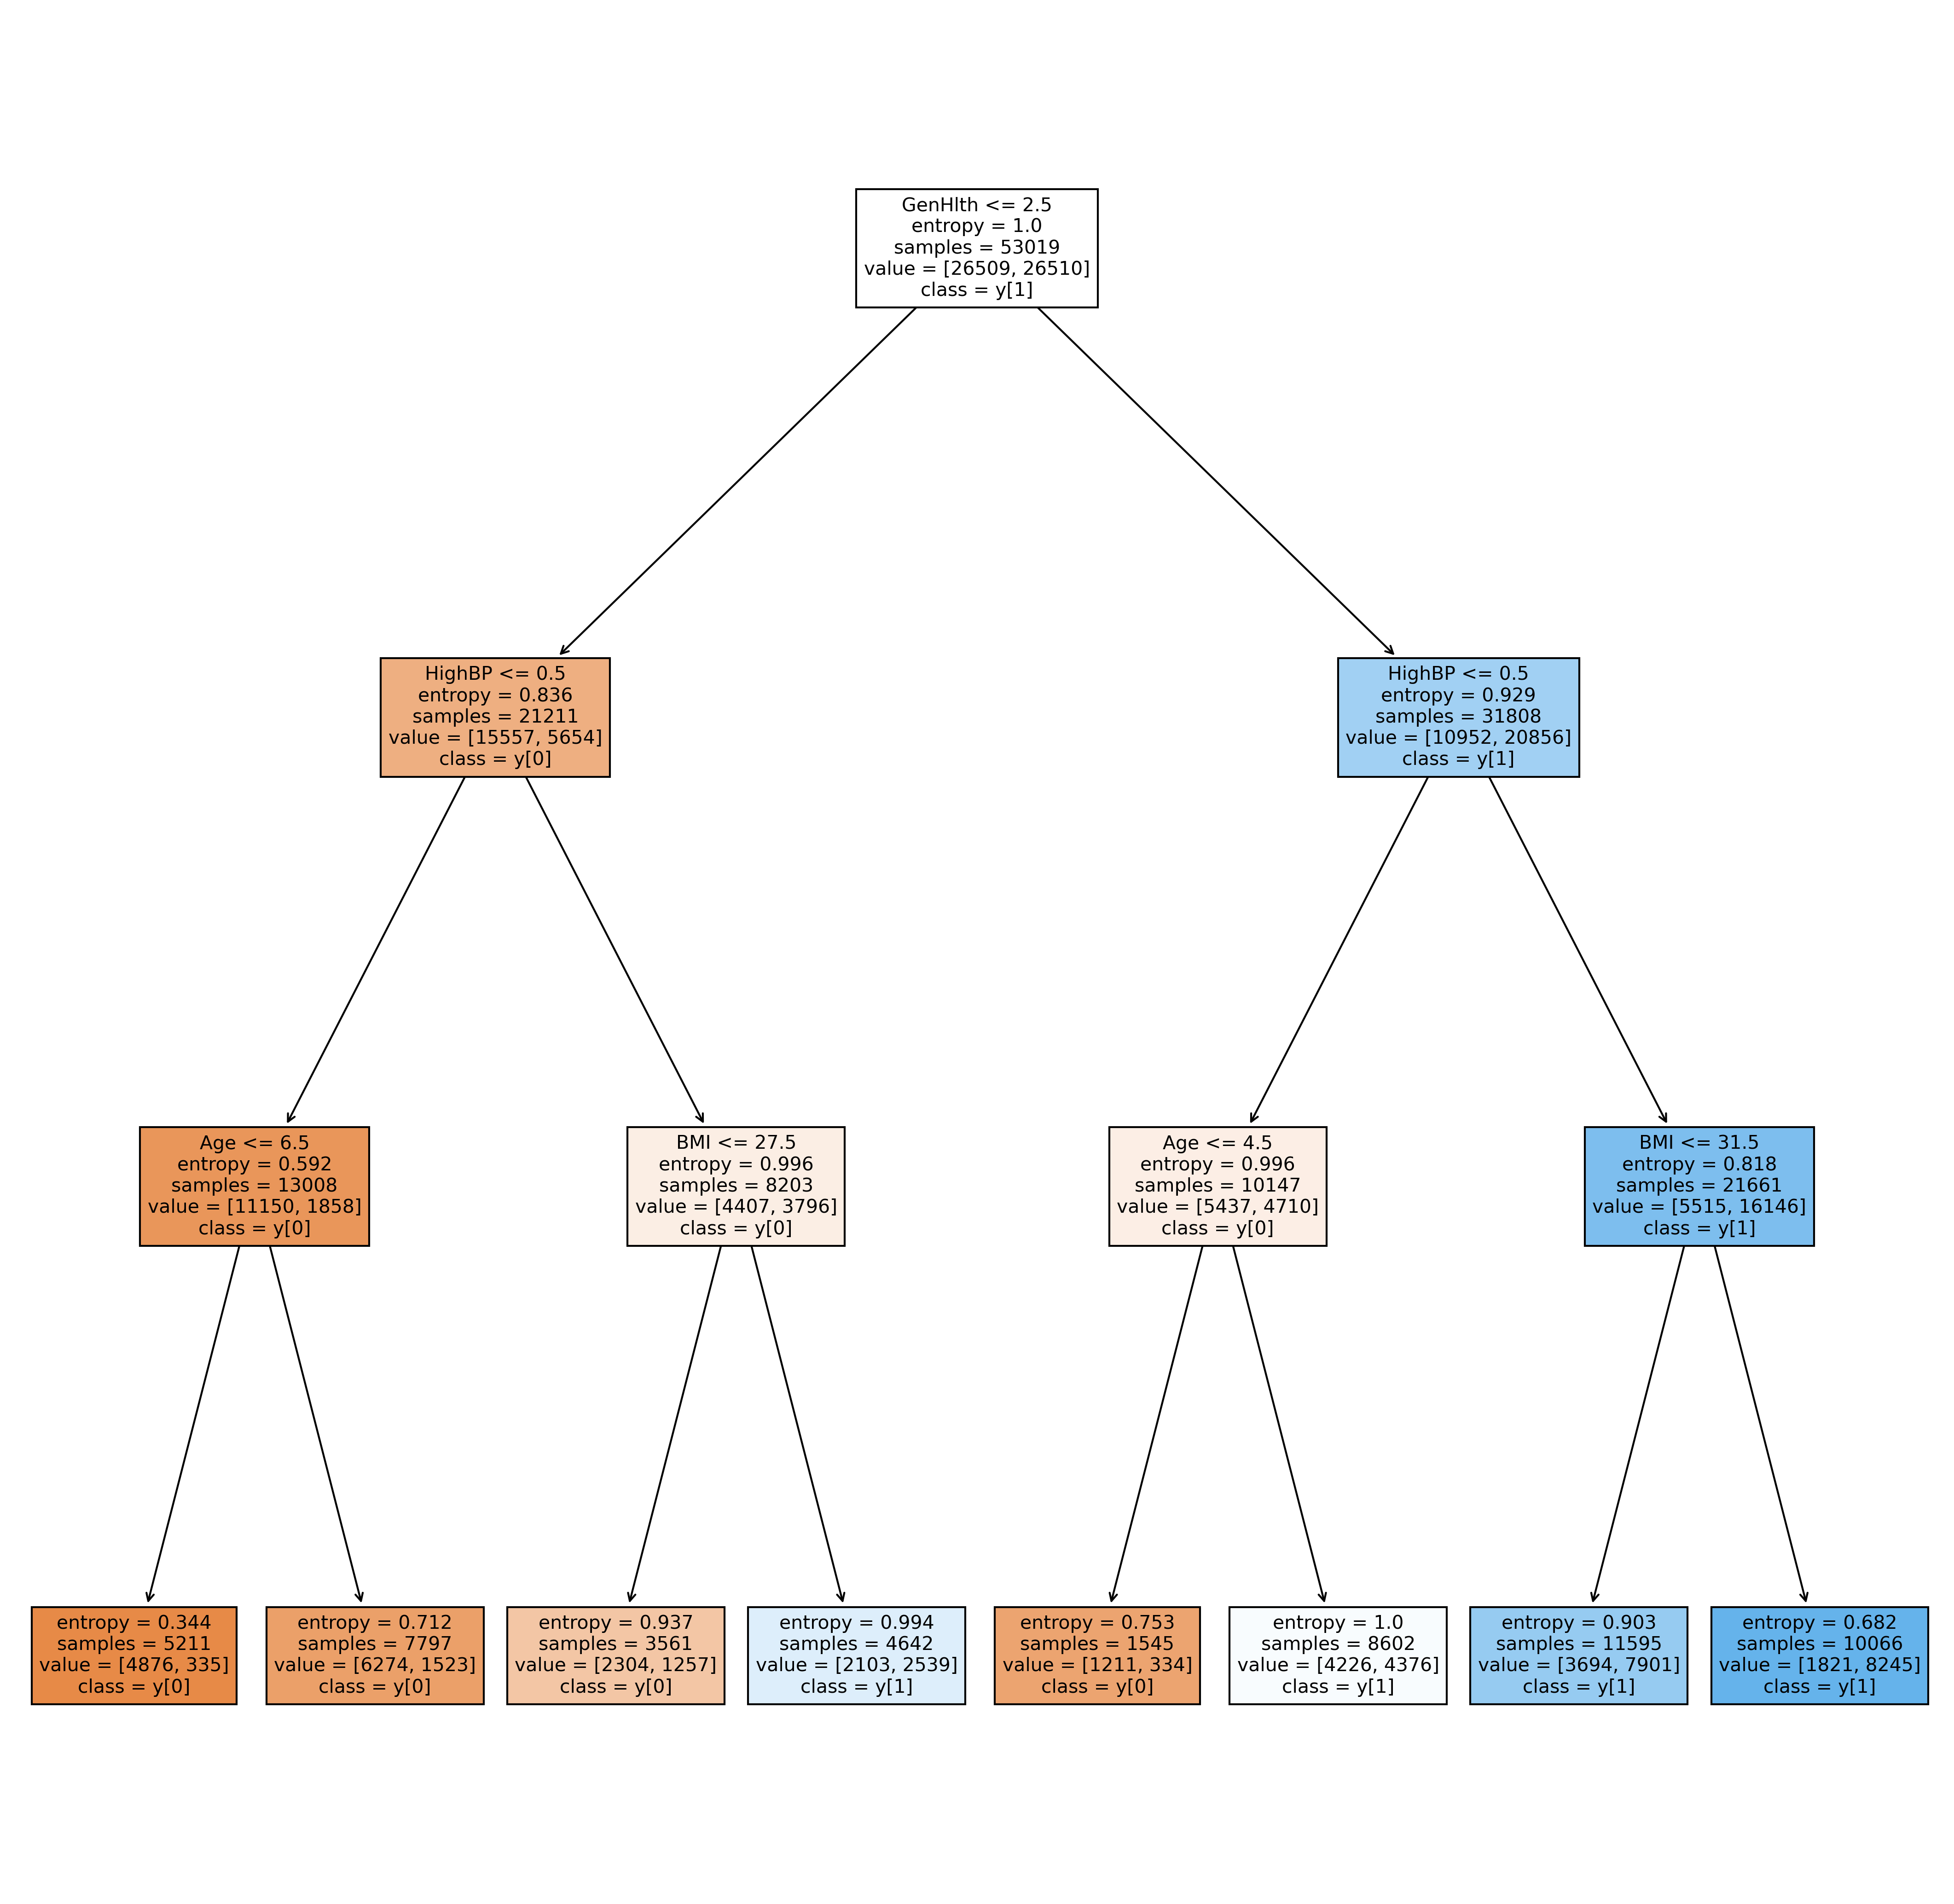

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=300)

plot_tree(dtc_grid.best_estimator_["dtc"], feature_names=X_train.columns, class_names=True, filled = True)

____________
____________

Quarto modelo: Random Forest

In [ ]:
# Dataset completo

X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

pipe = Pipeline([("rf", RandomForestClassifier())])

rf_params = {"rf__n_estimators" : range(100, 600, 100),
              "rf__max_depth" : range(3, 7),
              "rf__max_features" : ['sqrt', 'log2'],
              "rf__criterion" : ['entropy', 'gini']}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

rf_grid = GridSearchCV(estimator=pipe, param_grid=rf_params, scoring='recall', cv=splitter)

rf_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("Random Forest best hyperparameters: ", rf_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
rf_recall = cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='recall')

# Print the mean recall score for each estimator
print("Random Forest mean recall score: ", rf_recall.mean())

Random Forest best hyperparameters:  {'rf__criterion': 'gini', 'rf__max_depth': 6, 'rf__max_features': 'log2', 'rf__n_estimators': 100}
Random Forest mean recall score:  0.7886978302339409


[[6177 2660]
 [1891 6945]]


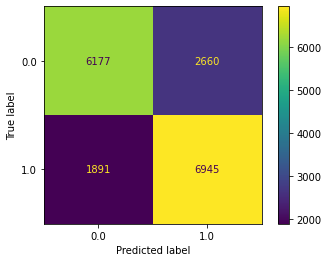

In [ ]:
y_pred = rf_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      8837
         1.0       0.72      0.79      0.75      8836

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



Demorou 35min para rodar

____________
____________

In [ ]:
# Random Forest dropando colunas

X = df2.drop('Diabetes', axis = 1)
y = df2['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

pipe = Pipeline([("rf", RandomForestClassifier())])

rf_params = {"rf__n_estimators" : range(100, 600, 100),
              "rf__max_depth" : range(3, 7),
              "rf__max_features" : ['sqrt', 'log2'],
              "rf__criterion" : ['entropy', 'gini']}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

rf_grid = GridSearchCV(estimator=pipe, param_grid=rf_params, scoring='recall', cv=splitter)

rf_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("Random Forest best hyperparameters: ", rf_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
rf_recall = cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='recall')

# Print the mean recall score for each estimator
print("Random Forest mean recall score: ", rf_recall.mean())

Random Forest best hyperparameters:  {'rf__criterion': 'gini', 'rf__max_depth': 6, 'rf__max_features': 'log2', 'rf__n_estimators': 100}
Random Forest mean recall score:  0.7911403920399356


[[6127 2710]
 [1834 7002]]


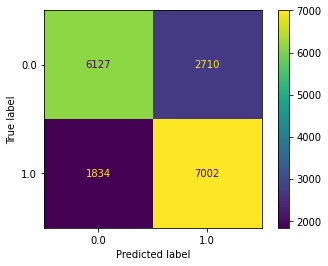

In [ ]:
y_pred = rf_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      8837
         1.0       0.72      0.79      0.76      8836

    accuracy                           0.74     17673
   macro avg       0.75      0.74      0.74     17673
weighted avg       0.75      0.74      0.74     17673



Demorou 15mins para rodar

ValueError: ignored

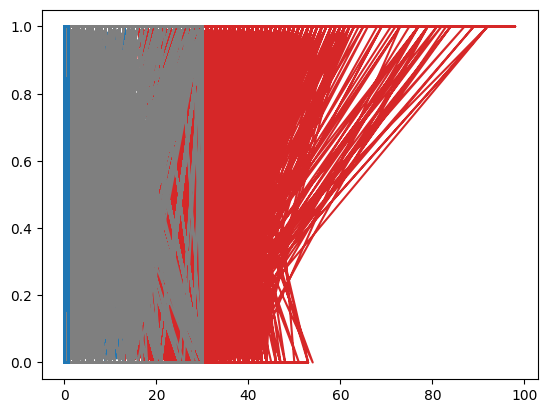

In [ ]:
plt.plot(X_test, y_pred, label="Model")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("teste")
plt.show()

____________
____________

StandardScaler aplica a todas as colunas, mesmo já sendo binárias?

Melhorar a regressao logistica;
pairplot;
o gráfico para ver se tá under ou overfittado (aula 5 knregressao);